In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn import svm
from sklearn.model_selection import cross_val_score, train_test_split, cross_val_predict
from sklearn.metrics import log_loss, make_scorer
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier


import xgboost as xgb

import warnings
warnings.filterwarnings('ignore')

In [14]:
eeg_data = pd.read_csv('emotions.csv')
eeg_data.dtypes

# mean_0_a     float64
mean_1_a       float64
mean_2_a       float64
mean_3_a       float64
mean_4_a       float64
mean_d_0_a     float64
mean_d_1_a     float64
mean_d_2_a     float64
mean_d_3_a     float64
mean_d_4_a     float64
mean_d_0_a2    float64
mean_d_1_a2    float64
mean_d_2_a2    float64
mean_d_3_a2    float64
mean_d_4_a2    float64
mean_d_5_a     float64
mean_d_6_a     float64
mean_d_7_a     float64
mean_d_8_a     float64
mean_d_9_a     float64
mean_d_10_a    float64
mean_d_11_a    float64
mean_d_12_a    float64
mean_d_13_a    float64
mean_d_14_a    float64
mean_d_15_a    float64
mean_d_16_a    float64
mean_d_17_a    float64
mean_d_18_a    float64
mean_d_19_a    float64
                ...   
fft_721_b      float64
fft_722_b      float64
fft_723_b      float64
fft_724_b      float64
fft_725_b      float64
fft_726_b      float64
fft_727_b      float64
fft_728_b      float64
fft_729_b      float64
fft_730_b      float64
fft_731_b      float64
fft_732_b      float64
fft_733_b  

In [15]:
eeg_data.head()

,# mean_0_a,mean_1_a,mean_2_a,mean_3_a,mean_4_a,mean_d_0_a,mean_d_1_a,mean_d_2_a,mean_d_3_a,mean_d_4_a,...,fft_741_b,fft_742_b,fft_743_b,fft_744_b,fft_745_b,fft_746_b,fft_747_b,fft_748_b,fft_749_b,label
0,4.62,30.3,-356.0,15.6,26.3,1.070,0.411,-15.70,2.06,3.15,...,23.5,20.3,20.3,23.5,-215.0,280.00,-162.00,-162.00,280.00,NEGATIVE
1,28.80,33.1,32.0,25.8,22.8,6.550,1.680,2.88,3.83,-4.82,...,-23.3,-21.8,-21.8,-23.3,182.0,2.57,-31.60,-31.60,2.57,NEUTRAL
2,8.90,29.4,-416.0,16.7,23.7,79.900,3.360,90.20,89.90,2.03,...,462.0,-233.0,-233.0,462.0,-267.0,281.00,-148.00,-148.00,281.00,POSITIVE
3,14.90,31.6,-143.0,19.8,24.3,-0.584,-0.284,8.82,2.30,-1.97,...,299.0,-243.0,-243.0,299.0,132.0,-12.40,9.53,9.53,-12.40,POSITIVE
4,28.30,31.3,45.2,27.3,24.5,34.800,-5.790,3.06,41.40,5.52,...,12.0,38.1,38.1,12.0,119.0,-17.60,23.90,23.90,-17.60,NEUTRAL


In [16]:
eeg_data.tail()

,# mean_0_a,mean_1_a,mean_2_a,mean_3_a,mean_4_a,mean_d_0_a,mean_d_1_a,mean_d_2_a,mean_d_3_a,mean_d_4_a,...,fft_741_b,fft_742_b,fft_743_b,fft_744_b,fft_745_b,fft_746_b,fft_747_b,fft_748_b,fft_749_b,label
2127,32.400,32.2,32.2,30.80,23.4,1.64,-2.03,0.647,-0.121,-1.10,...,-21.70,0.218,0.218,-21.70,95.2,-19.90,47.2,47.2,-19.90,NEUTRAL
2128,16.300,31.3,-284.0,14.30,23.9,4.20,1.09,4.460,4.720,6.63,...,594.00,-324.000,-324.000,594.00,-35.5,142.00,-59.8,-59.8,142.00,POSITIVE
2129,-0.547,28.3,-259.0,15.80,26.7,9.08,6.90,12.700,2.030,4.64,...,370.00,-160.000,-160.000,370.00,408.0,-169.00,-10.5,-10.5,-169.00,NEGATIVE
2130,16.800,19.9,-288.0,8.34,26.0,2.46,1.58,-16.000,1.690,4.74,...,124.00,-27.600,-27.600,124.00,-656.0,552.00,-271.0,-271.0,552.00,NEGATIVE
2131,27.000,32.0,31.8,25.00,28.9,4.99,1.95,6.210,3.490,-3.51,...,1.95,1.810,1.810,1.95,110.0,-6.71,22.8,22.8,-6.71,NEUTRAL


In [17]:
# collect different parameters of data: mean, standard dev, etc.
eeg_data.describe()

,# mean_0_a,mean_1_a,mean_2_a,mean_3_a,mean_4_a,mean_d_0_a,mean_d_1_a,mean_d_2_a,mean_d_3_a,mean_d_4_a,...,fft_740_b,fft_741_b,fft_742_b,fft_743_b,fft_744_b,fft_745_b,fft_746_b,fft_747_b,fft_748_b,fft_749_b
count,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,...,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000
mean,15.256914,27.012462,-104.975629,13.605898,24.150483,0.025378,0.052282,0.301655,0.036793,0.083567,...,-22.938971,104.946111,-51.973647,-51.973647,104.946111,-6.934144,95.104886,-49.061255,-49.061255,95.104886
std,15.284621,9.265141,206.271960,16.874676,14.187340,17.981796,8.509174,68.098894,17.010031,18.935378,...,298.034311,212.532721,112.160233,112.160233,212.532721,281.040552,203.194976,106.486317,106.486317,203.194976
min,-61.300000,-114.000000,-970.000000,-137.000000,-217.000000,-218.000000,-255.000000,-1360.000000,-203.000000,-553.000000,...,-1180.000000,-921.000000,-504.000000,-504.000000,-921.000000,-1160.000000,-1010.000000,-521.000000,-521.000000,-1010.000000
25%,6.577500,26.075000,-195.000000,4.857500,23.600000,-3.105000,-1.340000,-4.002500,-2.905000,-2.622500,...,-106.500000,-8.365000,-92.900000,-92.900000,-8.365000,-102.500000,-8.837500,-87.150000,-87.150000,-8.837500
50%,14.100000,30.000000,14.950000,15.400000,25.200000,-0.044600,0.132000,0.957500,-0.099750,0.146500,...,83.850000,12.150000,-21.800000,-21.800000,12.150000,89.700000,13.400000,-24.100000,-24.100000,13.400000
75%,27.700000,31.400000,29.600000,26.500000,26.800000,2.920000,1.540000,6.735000,2.535000,2.870000,...,154.000000,177.000000,12.025000,12.025000,177.000000,153.000000,149.250000,10.925000,10.925000,149.250000
max,304.000000,42.300000,661.000000,206.000000,213.000000,402.000000,257.000000,1150.000000,349.000000,444.000000,...,1070.000000,843.000000,1490.000000,1490.000000,843.000000,1180.000000,888.000000,1670.000000,1670.000000,888.000000


Text(0.5, 0, 'Label')

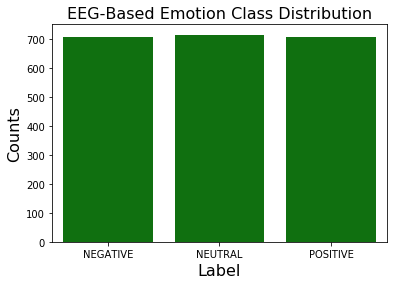

In [18]:
# delcaring the size of our plot graph
sns.countplot(eeg_data['label'], color='green') # of class labels
plt.title('EEG-Based Emotion Class Distribution', fontsize=16)
plt.ylabel('Counts', fontsize=16)
plt.xlabel('Label', fontsize=16)

In [19]:
# calculate the entropy for a dataset
from math import log2

# proprotion of examples in each class
neutral_probability = 716/2132
negative_probability = 708/2132
positive_probability = 716/2132

In [20]:
def entropy(class1, class2, class3):
    return -(class1 * log2(class1) + class2 * log2(class2) + class3 * log2(class3))

In [21]:
# print the result
class_entropy = entropy(neutral_probability, negative_probability, positive_probability)
print('Entropy: %.3f bits ' % class_entropy)

Entropy: 1.585 bits 


In [22]:
labels = eeg_data['label']

eeg_data.drop('label', axis = 1, inplace=True)

eeg_data.head()

,# mean_0_a,mean_1_a,mean_2_a,mean_3_a,mean_4_a,mean_d_0_a,mean_d_1_a,mean_d_2_a,mean_d_3_a,mean_d_4_a,...,fft_740_b,fft_741_b,fft_742_b,fft_743_b,fft_744_b,fft_745_b,fft_746_b,fft_747_b,fft_748_b,fft_749_b
0,4.62,30.3,-356.0,15.6,26.3,1.070,0.411,-15.70,2.06,3.15,...,74.3,23.5,20.3,20.3,23.5,-215.0,280.00,-162.00,-162.00,280.00
1,28.80,33.1,32.0,25.8,22.8,6.550,1.680,2.88,3.83,-4.82,...,130.0,-23.3,-21.8,-21.8,-23.3,182.0,2.57,-31.60,-31.60,2.57
2,8.90,29.4,-416.0,16.7,23.7,79.900,3.360,90.20,89.90,2.03,...,-534.0,462.0,-233.0,-233.0,462.0,-267.0,281.00,-148.00,-148.00,281.00
3,14.90,31.6,-143.0,19.8,24.3,-0.584,-0.284,8.82,2.30,-1.97,...,-183.0,299.0,-243.0,-243.0,299.0,132.0,-12.40,9.53,9.53,-12.40
4,28.30,31.3,45.2,27.3,24.5,34.800,-5.790,3.06,41.40,5.52,...,114.0,12.0,38.1,38.1,12.0,119.0,-17.60,23.90,23.90,-17.60


In [23]:
# We are gathering information about how variables (columns) correlate w/ each other. Ex. does one change in response to another?
correlations = eeg_data.corr(method='pearson')
correlations

,# mean_0_a,mean_1_a,mean_2_a,mean_3_a,mean_4_a,mean_d_0_a,mean_d_1_a,mean_d_2_a,mean_d_3_a,mean_d_4_a,...,fft_740_b,fft_741_b,fft_742_b,fft_743_b,fft_744_b,fft_745_b,fft_746_b,fft_747_b,fft_748_b,fft_749_b
# mean_0_a,1.000000,0.176578,0.429810,0.582697,0.178432,-0.000665,0.105961,-0.061046,0.135370,0.008472,...,0.301672,-0.245671,0.204764,0.204764,-0.245671,0.268983,-0.220566,0.196653,0.196653,-0.220566
mean_1_a,0.176578,1.000000,-0.007202,0.571530,0.385041,-0.088608,-0.007586,-0.050463,-0.119391,-0.017197,...,0.130717,-0.047208,0.002549,0.002549,-0.047208,0.153244,-0.096173,0.069532,0.069532,-0.096173
mean_2_a,0.429810,-0.007202,1.000000,0.081567,-0.095696,0.015122,0.014605,-0.004320,0.055625,-0.003564,...,0.699461,-0.742275,0.622567,0.622567,-0.742275,0.674195,-0.728296,0.565044,0.565044,-0.728296
mean_3_a,0.582697,0.571530,0.081567,1.000000,0.220842,-0.117748,0.124462,-0.175592,-0.001782,0.017110,...,0.133720,-0.067460,0.048202,0.048202,-0.067460,0.103294,-0.061376,0.051216,0.051216,-0.061376
mean_4_a,0.178432,0.385041,-0.095696,0.220842,1.000000,-0.017196,-0.007570,0.025546,-0.033443,-0.020361,...,-0.043602,0.069458,-0.090163,-0.090163,0.069458,-0.039620,0.056452,-0.016933,-0.016933,0.056452
mean_d_0_a,-0.000665,-0.088608,0.015122,-0.117748,-0.017196,1.000000,-0.520816,0.289196,0.424223,0.263961,...,0.036257,0.001320,0.007608,0.007608,0.001320,0.024944,0.002976,-0.017169,-0.017169,0.002976
mean_d_1_a,0.105961,-0.007586,0.014605,0.124462,-0.007570,-0.520816,1.000000,-0.299949,0.274802,-0.087698,...,-0.051368,-0.006839,-0.024373,-0.024373,-0.006839,-0.043387,-0.001477,0.003350,0.003350,-0.001477
mean_d_2_a,-0.061046,-0.050463,-0.004320,-0.175592,0.025546,0.289196,-0.299949,1.000000,0.060814,0.011967,...,0.095084,-0.053074,0.144749,0.144749,-0.053074,0.098389,-0.061713,0.149472,0.149472,-0.061713
mean_d_3_a,0.135370,-0.119391,0.055625,-0.001782,-0.033443,0.424223,0.274802,0.060814,1.000000,0.110584,...,-0.020794,-0.006047,-0.042957,-0.042957,-0.006047,-0.022019,0.005671,-0.040408,-0.040408,0.005671
mean_d_4_a,0.008472,-0.017197,-0.003564,0.017110,-0.020361,0.263961,-0.087698,0.011967,0.110584,1.000000,...,0.003370,-0.000915,0.000092,0.000092,-0.000915,-0.003329,-0.005395,0.003422,0.003422,-0.005395


In [24]:
skew = eeg_data.skew()
skew

# mean_0_a      3.839961
mean_1_a       -5.400903
mean_2_a       -1.769376
mean_3_a        0.293842
mean_4_a       -3.911369
mean_d_0_a      5.037609
mean_d_1_a      0.259055
mean_d_2_a     -2.678249
mean_d_3_a      4.729592
mean_d_4_a     -5.799641
mean_d_0_a2    -1.280704
mean_d_1_a2   -12.338497
mean_d_2_a2    -1.557033
mean_d_3_a2    -1.505519
mean_d_4_a2   -19.863973
mean_d_5_a      9.340996
mean_d_6_a     -6.490151
mean_d_7_a     -1.619659
mean_d_8_a      3.061302
mean_d_9_a      8.191188
mean_d_10_a    -1.296867
mean_d_11_a   -12.576537
mean_d_12_a    -1.558395
mean_d_13_a    -1.506060
mean_d_14_a   -20.465480
mean_d_15_a     9.316563
mean_d_16_a    -6.483794
mean_d_17_a    -1.626358
mean_d_18_a     3.039943
mean_d_19_a     9.258123
                 ...    
fft_720_b      -1.165149
fft_721_b       1.289832
fft_722_b       0.751271
fft_723_b       0.751271
fft_724_b       1.289832
fft_725_b      -1.271173
fft_726_b       1.322905
fft_727_b       0.663377
fft_728_b       0.663377


In [25]:
%%time
# Random Forest Classifier

random_forest_classifier = Pipeline(steps=[('random_forest', RandomForestClassifier())])
scores = cross_val_score(random_forest_classifier, eeg_data, labels, cv=10,scoring='accuracy')
print('Accuracy for RandomForest : ', scores.mean() * 100)

Accuracy for RandomForest :  97.46448200950695
Wall time: 11.5 s


In [39]:
# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.title('Scatter and Density Plot', fontsize=16)
    plt.show()

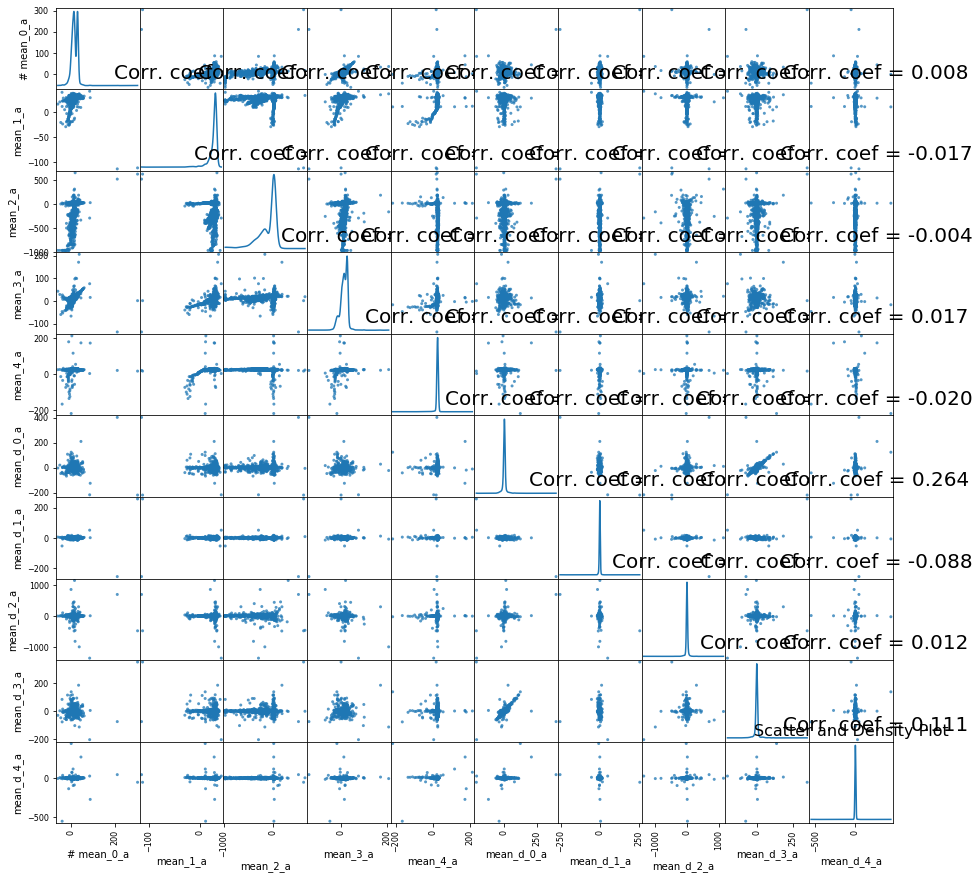

In [41]:
plotScatterMatrix(eeg_data, 15, 20)